In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
florida = pd.read_excel('./florida_2017.xls')
headers = ['city', 'population', 'violent_crime', 'murder', 'rape', 'robbery',
           'assault', 'property_crime', 'burglary', 'larceny_theft',
           'motor_vehicle_theft', 'arson']
florida.columns = headers
florida.set_index('city', inplace=True)

crime_cols = ['violent_crime', 'murder', 'rape', 'robbery', 'assault',
                  'property_crime', 'burglary', 'larceny_theft',
                  'motor_vehicle_theft', 'arson']

In [62]:
for crime in crime_cols:
    florida["has_" + crime] = np.where(florida[crime] > 0, 1, 0)
    florida["log_" + crime] = np.log1p(florida[crime])

In [63]:
florida['total_crimes'] = florida[crime_cols].sum(axis = 1)
florida['crime_per_capita']= florida['total_crimes']/florida['population']
florida["population_log"] = np.log(florida["population"])
florida["population_log_group"] = pd.cut(florida["population_log"], 3, labels=[1,2,3])

In [77]:
florida.loc[florida["crime_per_capita"].idxmax()]

population                   111027
violent_crime                   958
murder                            8
rape                             61
robbery                         410
assault                         479
property_crime                 5330
burglary                        898
larceny_theft                  3624
motor_vehicle_theft             808
arson                             8
has_violent_crime                 1
log_violent_crime           6.86589
has_murder                        1
log_murder                  2.19722
has_rape                          1
log_rape                    4.12713
has_robbery                       1
log_robbery                 6.01859
has_assault                       1
log_assault                 6.17379
has_property_crime                1
log_property_crime          8.58129
has_burglary                      1
log_burglary                6.80128
has_larceny_theft                 1
log_larceny_theft           8.19561
has_motor_vehicle_theft     

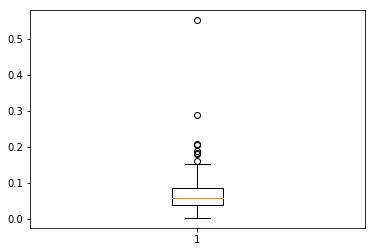

In [67]:
plt.boxplot(florida["crime_per_capita"])
plt.show()

In [68]:
florida["crime_per_capita"].quantile(0.90)

0.11356295664351337

In [69]:
(florida["crime_per_capita"] > 0.11356295664351337).sum()

29

In [70]:
# so there are 29 cities with extremely high crime per capita
outliers = florida[florida["crime_per_capita"] > 0.11356295664351337]
outliers.describe()

,population,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,...,log_burglary,has_larceny_theft,log_larceny_theft,has_motor_vehicle_theft,log_motor_vehicle_theft,has_arson,log_arson,total_crimes,crime_per_capita,population_log
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.0,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,38223.482759,323.206897,3.724138,26.068966,85.517241,207.896552,2196.413793,330.758621,1696.413793,169.241379,...,4.771895,1.0,6.311958,1.0,3.770465,0.724138,1.122419,5043.034483,0.160261,9.349460
std,67836.018141,498.002752,5.737698,50.462809,147.081275,306.600292,3713.672417,566.315640,2840.983828,322.138574,...,1.476440,0.0,1.584902,0.0,1.725640,0.454859,0.939620,8410.193282,0.084574,1.627535
min,466.000000,3.000000,0.000000,0.000000,0.000000,2.000000,25.000000,5.000000,14.000000,1.000000,...,1.791759,1.0,2.708050,1.0,0.693147,0.000000,0.000000,56.000000,0.113658,6.144186
25%,2836.000000,45.000000,0.000000,3.000000,7.000000,34.000000,244.000000,62.000000,187.000000,8.000000,...,4.143135,1.0,5.236442,1.0,2.197225,0.000000,0.000000,579.000000,0.122047,7.950150
50%,11478.000000,109.000000,2.000000,6.000000,26.000000,65.000000,741.000000,122.000000,627.000000,39.000000,...,4.812184,1.0,6.442540,1.0,3.688879,1.000000,1.098612,1638.000000,0.135279,9.348187
75%,22763.000000,325.000000,4.000000,12.000000,78.000000,225.000000,1319.000000,256.000000,977.000000,123.000000,...,5.549076,1.0,6.885510,1.0,4.820282,1.000000,1.791759,3109.000000,0.161469,10.032892
max,283982.000000,2113.000000,23.000000,190.000000,605.000000,1302.000000,15490.000000,2388.000000,11715.000000,1387.000000,...,7.778630,1.0,9.368711,1.0,7.235619,1.000000,3.135494,35228.000000,0.552133,12.556666


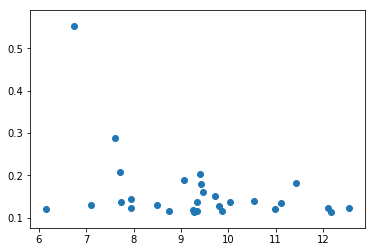

In [71]:
plt.scatter(np.log(outliers.population), outliers["crime_per_capita"])

In [72]:
florida = florida.drop(list(outliers.index))

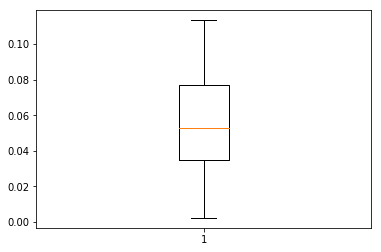

In [73]:
plt.boxplot(florida["crime_per_capita"])
plt.show()

In [74]:
# that looks better :)
# now lets make a target variable
florida["crime_per_capita"].describe()

count    255.000000
mean       0.055822
std        0.026524
min        0.002291
25%        0.034960
50%        0.052758
75%        0.076976
max        0.113342
Name: crime_per_capita, dtype: float64

In [75]:
# lets mark cities with a crime_per_capita < 0.034267 as Safe
florida['safe_city'] = np.where(florida['crime_per_capita'] <= 0.034267, 1, 0)

In [78]:
model_vars = ['violent_crime', 'murder', 'rape', 'robbery', 'assault',
       'property_crime', 'burglary', 'larceny_theft', 'motor_vehicle_theft',
       'arson', 'has_violent_crime', 'log_violent_crime', 'has_murder',
       'log_murder', 'has_rape', 'log_rape', 'has_robbery', 'log_robbery',
       'has_assault', 'log_assault', 'has_property_crime',
       'log_property_crime', 'has_burglary', 'log_burglary',
       'has_larceny_theft', 'log_larceny_theft', 'has_motor_vehicle_theft',
       'log_motor_vehicle_theft', 'has_arson', 'log_arson', 'population_log', 'population_log_group']

# Vanilla Logistic Regression

In [79]:
from sklearn.model_selection import train_test_split
y = florida['safe_city']
X = florida[model_vars]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(C=1e9, solver='liblinear')
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print("Score on train set: {:.3f}".format(train_score))
print("Score on test set: {:.3f}".format(test_score))

Score on train set: 1.000
Score on test set: 0.855


In [107]:
coeffecients = pd.DataFrame(model_vars, columns=["feature"])
coeffecients["coeffecient"] = lr.coef_.reshape(32,1)
coeffecients

,feature,coeffecient
0,violent_crime,-0.376970
1,murder,-0.184217
2,rape,0.914052
3,robbery,-0.673650
4,assault,-0.433154
5,property_crime,0.066017
6,burglary,0.199753
7,larceny_theft,-0.042653
8,motor_vehicle_theft,-0.091083
9,arson,-1.855926


In [118]:
coeffecients.coeffecient.describe()

count    32.000000
mean     -0.510811
std       2.453219
min      -5.700039
25%      -2.002941
50%      -0.206302
75%       0.518745
max       6.874337
Name: coeffecient, dtype: float64

*Those features with coefficients close to 0 might be able to be removed without losing a lot of predictive power.*

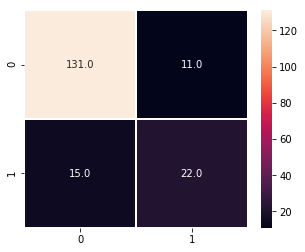

In [112]:
#Confusion Matrix
cm_lr = metrics.confusion_matrix(y_true=y_test, y_pred=lr.predict(X_test))
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# Ridge Regression

In [114]:
rr = LogisticRegression(penalty ='l2', solver='liblinear')
rr.fit(X_train, y_train)
train_score_rr = rr.score(X_train, y_train)
test_score_rr = rr.score(X_test, y_test)
print("Score on train set: {:.3f}".format(train_score_rr))
print("Score on test set: {:.3f}".format(test_score_rr))

Score on train set: 0.961
Score on test set: 0.827


In [115]:
coeffecients_rr = pd.DataFrame(model_vars, columns=["feature"])
coeffecients_rr["coeffecient"] = rr.coef_.reshape(32,1)
coeffecients_rr

,feature,coeffecient
0,violent_crime,-0.136340
1,murder,-0.053893
2,rape,0.229790
3,robbery,-0.295506
4,assault,-0.016730
5,property_crime,0.022788
6,burglary,0.042659
7,larceny_theft,-0.016547
8,motor_vehicle_theft,-0.003324
9,arson,-0.319909


*Notice that ridge regression drastically reduced the magnitude of all of the coefficients.*

In [117]:
coeffecients_rr.coeffecient.describe()

count    32.000000
mean     -0.104052
std       0.417799
min      -1.111063
25%      -0.292170
50%      -0.046607
75%       0.035444
max       1.309712
Name: coeffecient, dtype: float64

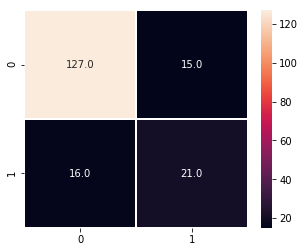

In [119]:
#Confusion Matrix
cm_rr = metrics.confusion_matrix(y_true=y_test, y_pred=rr.predict(X_test))
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rr, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# LASSO Regression

In [123]:
lassoregr = LogisticRegression(penalty ='l1', solver='liblinear')
lassoregr.fit(X_train, y_train)
train_score_lasso = lassoregr.score(X_train, y_train)
test_score_lasso = lassoregr.score(X_test, y_test)
print("Score on train set: {:.3f}".format(train_score_lasso))
print("Score on test set: {:.3f}".format(test_score_lasso))

Score on train set: 0.947
Score on test set: 0.827


In [124]:
coeffecients_lasso = pd.DataFrame(model_vars, columns=["feature"])
coeffecients_lasso["coeffecient"] = lassoregr.coef_.reshape(32,1)
coeffecients_lasso

,feature,coeffecient
0,violent_crime,-0.064947
1,murder,0.000000
2,rape,0.085216
3,robbery,-0.514343
4,assault,-0.084967
5,property_crime,0.006134
6,burglary,0.056782
7,larceny_theft,0.004246
8,motor_vehicle_theft,0.010976
9,arson,0.000000


*With LASSO regression, we have "shrunk" 19 features to absolute zero, aka we can reduce the dimensions from 32 to 13.*

In [127]:
coeffecients_lasso.coeffecient.describe()

count    32.000000
mean     -0.085516
std       0.459346
min      -1.602371
25%       0.000000
50%       0.000000
75%       0.000000
max       1.312874
Name: coeffecient, dtype: float64

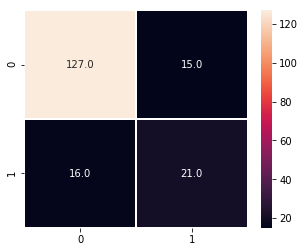

In [128]:
#Confusion Matrix
cm_lasso = metrics.confusion_matrix(y_true=y_test, y_pred=lassoregr.predict(X_test))
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_lasso, annot=True, linewidths=.5, fmt= '.1f',ax=ax);